# Cards Model Test

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from jass.train.label_play import LabelPlay
from jass.logs.game_log_entry import GameLogEntry
from jass.game.game_state_util import state_from_complete_game
from jass.game.game_state_util import calculate_starting_hands_from_game
from examples.io.convert_swisslos_log_to_games import LogParserSwisslos

In [3]:
cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

user  = ['user']
played_card  = ['played_card']

entries = []
path = Path("jass-games") / "jass_game_0001.txt"
with open(path) as file:
    for x in range(10000):
        content = json.loads(file.readline())
        entry = GameLogEntry.from_json(content)
        entries.append(entry)

#entries = LogParserSwisslos.parse_rounds(path)

rows = []

for entry in entries:
    for nrCards in range(0,34):
        round_state = state_from_complete_game(entry.game, nrCards)
        row = round_state.hands[round_state.player] # hand of the player
        
        next_round_state = state_from_complete_game(entry.game, nrCards + 1)
        #print(round_state.current_trick)
        #print(next_round_state.tricks[round_state.nr_tricks])
        card = np.setdiff1d(next_round_state.tricks[round_state.nr_tricks], round_state.current_trick)
        #print(card)
        row = np.append(row,card[0])
        rows.append(row)

data =pd.DataFrame(data=rows ,columns=cards + played_card)

pd.set_option('display.max_columns', None)
data.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,HK,HQ,HJ,H10,H9,H8,H7,H6,SA,SK,SQ,SJ,S10,S9,S8,S7,S6,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,played_card
0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,9
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,14
2,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,13
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,4
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,30


## import player statistics

In [4]:
#stats = pd.read_json("04 Data/stat/player_all_stat.json")
#stats.head()

In [5]:
#stats.sort_values(by=['mean'], ascending=False)

# Drop bad players

In [6]:
#good_users = stats.loc[(stats['mean'] > 79) & (stats['nr'] > 5)]
#good_users

In [7]:
#data = data[data['user'].isin(good_users['id'])]
#data

# Training

In [8]:
from sklearn.model_selection import train_test_split
feature_columns = []


In [9]:
x_data = data[cards + feature_columns]
y_data = data.played_card

In [10]:
X_train, X_test, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size=0.2, stratify=data.played_card, random_state=42)

print(y_train_data)
#y_train_label = np.argmax(x_train, axis=1)
#y_categorical = tf.keras.utils.to_categorical(y_train_label, num_classes=4)

177295    34
217616    18
308475    13
66814      7
81698     11
          ..
113099    18
326590    31
20518     16
228052    18
161034    35
Name: played_card, Length: 272000, dtype: int64


In [11]:
y_train = pd.get_dummies(y_train_data)
y_test = pd.get_dummies(y_test_data)
print(y_train)

        0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  \
177295   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
217616   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
308475   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   
66814    0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
81698    0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
113099   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
326590   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
20518    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
228052   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
161034   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

        17  18  19  20  21  22  23  24  25  26  27  28  29  30 

In [12]:
input_length = len(cards + feature_columns)

model = keras.Sequential()
model.add(keras.layers.Dense(input_length, activation='relu', input_shape=[input_length]))
model.add(keras.layers.Dense(80, activation='relu'))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(36, activation='relu'))
model.add(keras.layers.Dense(14, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(36, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.25, epochs=300, batch_size=100)

Epoch 1/300
2040/2040 [==============================] - 3s 2ms/step - loss: 3.5658 - accuracy: 0.0388 - val_loss: 3.5319 - val_accuracy: 0.0743
Epoch 2/300
2040/2040 [==============================] - 3s 2ms/step - loss: 3.5056 - accuracy: 0.0584 - val_loss: 3.4236 - val_accuracy: 0.1319
Epoch 3/300
2040/2040 [==============================] - 3s 2ms/step - loss: 3.4235 - accuracy: 0.0792 - val_loss: 3.2970 - val_accuracy: 0.1758
Epoch 4/300
2040/2040 [==============================] - 3s 2ms/step - loss: 3.3643 - accuracy: 0.0891 - val_loss: 3.2151 - val_accuracy: 0.1921
Epoch 5/300
2040/2040 [==============================] - 3s 2ms/step - loss: 3.3261 - accuracy: 0.0931 - val_loss: 3.1642 - val_accuracy: 0.2006
Epoch 6/300
2040/2040 [==============================] - 3s 2ms/step - loss: 3.2900 - accuracy: 0.0959 - val_loss: 3.1069 - val_accuracy: 0.2003
Epoch 7/300
2040/2040 [==============================] - 3s 2ms/step - loss: 3.2618 - accuracy: 0.0986 - val_loss: 3.0681 - val_ac

2040/2040 [==============================] - 3s 2ms/step - loss: 2.9527 - accuracy: 0.1577 - val_loss: 2.5749 - val_accuracy: 0.2826
Epoch 56/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.9497 - accuracy: 0.1587 - val_loss: 2.5658 - val_accuracy: 0.2874
Epoch 57/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.9475 - accuracy: 0.1581 - val_loss: 2.5645 - val_accuracy: 0.2874
Epoch 58/300
2040/2040 [==============================] - 4s 2ms/step - loss: 2.9452 - accuracy: 0.1593 - val_loss: 2.5661 - val_accuracy: 0.2895
Epoch 59/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.9418 - accuracy: 0.1604 - val_loss: 2.5777 - val_accuracy: 0.2860
Epoch 60/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.9381 - accuracy: 0.1611 - val_loss: 2.5532 - val_accuracy: 0.2902
Epoch 61/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.9367 - accuracy: 0.1610 - val_loss: 2.5515 - val_accuracy

2040/2040 [==============================] - 3s 2ms/step - loss: 2.8678 - accuracy: 0.1745 - val_loss: 2.4613 - val_accuracy: 0.3037
Epoch 112/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8674 - accuracy: 0.1746 - val_loss: 2.4544 - val_accuracy: 0.3031
Epoch 113/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8679 - accuracy: 0.1734 - val_loss: 2.4596 - val_accuracy: 0.3045
Epoch 114/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8662 - accuracy: 0.1752 - val_loss: 2.4648 - val_accuracy: 0.3006
Epoch 115/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8632 - accuracy: 0.1758 - val_loss: 2.4466 - val_accuracy: 0.3013
Epoch 116/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8629 - accuracy: 0.1754 - val_loss: 2.4462 - val_accuracy: 0.3048
Epoch 117/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8629 - accuracy: 0.1757 - val_loss: 2.4476 - val_ac

Epoch 167/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8310 - accuracy: 0.1781 - val_loss: 2.4159 - val_accuracy: 0.3064
Epoch 168/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8316 - accuracy: 0.1778 - val_loss: 2.4088 - val_accuracy: 0.3068
Epoch 169/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8311 - accuracy: 0.1782 - val_loss: 2.4104 - val_accuracy: 0.3074
Epoch 170/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8292 - accuracy: 0.1780 - val_loss: 2.3954 - val_accuracy: 0.3069
Epoch 171/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8289 - accuracy: 0.1782 - val_loss: 2.3940 - val_accuracy: 0.3083
Epoch 172/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8299 - accuracy: 0.1771 - val_loss: 2.4094 - val_accuracy: 0.3066
Epoch 173/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8292 - accuracy: 0.1772 - val_loss: 2

Epoch 223/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8065 - accuracy: 0.1795 - val_loss: 2.3719 - val_accuracy: 0.3114
Epoch 224/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8062 - accuracy: 0.1806 - val_loss: 2.3759 - val_accuracy: 0.3103
Epoch 225/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8065 - accuracy: 0.1792 - val_loss: 2.3701 - val_accuracy: 0.3059
Epoch 226/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8054 - accuracy: 0.1790 - val_loss: 2.3659 - val_accuracy: 0.3085
Epoch 227/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8072 - accuracy: 0.1787 - val_loss: 2.3721 - val_accuracy: 0.3099
Epoch 228/300
2040/2040 [==============================] - 4s 2ms/step - loss: 2.8040 - accuracy: 0.1800 - val_loss: 2.3680 - val_accuracy: 0.3097
Epoch 229/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.8043 - accuracy: 0.1797 - val_loss: 2

Epoch 279/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.7877 - accuracy: 0.1805 - val_loss: 2.3459 - val_accuracy: 0.3119
Epoch 280/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.7877 - accuracy: 0.1811 - val_loss: 2.3418 - val_accuracy: 0.3102
Epoch 281/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.7902 - accuracy: 0.1800 - val_loss: 2.3502 - val_accuracy: 0.3098
Epoch 282/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.7867 - accuracy: 0.1810 - val_loss: 2.3349 - val_accuracy: 0.3134
Epoch 283/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.7867 - accuracy: 0.1806 - val_loss: 2.3504 - val_accuracy: 0.3122
Epoch 284/300
2040/2040 [==============================] - 4s 2ms/step - loss: 2.7853 - accuracy: 0.1813 - val_loss: 2.3387 - val_accuracy: 0.3129
Epoch 285/300
2040/2040 [==============================] - 3s 2ms/step - loss: 2.7862 - accuracy: 0.1794 - val_loss: 2

In [13]:
model.evaluate(X_test, y_test)

2125/2125 [==============================] - 3s 1ms/step - loss: 2.3348 - accuracy: 0.3109


[2.3347830772399902, 0.3109411895275116]

Text(0, 0.5, 'loss')

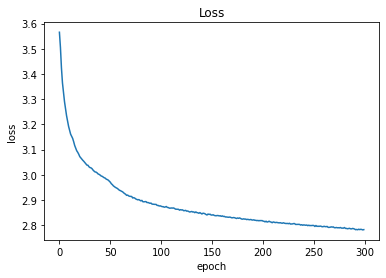

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

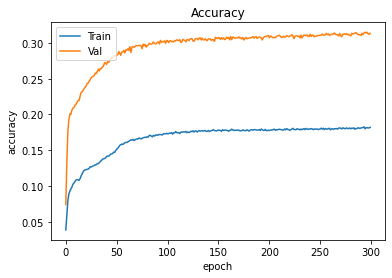

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Predict

In [18]:
hand = np.array([[0,1,1,1,0,1,0,0,0, 0,0,0,0,1,0,0,1,0, 1,0,0,0,0,0,0,0,0, 0,0,0,0,0,1,0,0,1]])
hand = pd.DataFrame(data=hand, columns=cards)

print(hand)
input_hand = np.array([hand.iloc[0].values])
prediction = model.predict(input_hand)
result = pd.DataFrame(data=prediction, columns=cards)
print(result)
result.idxmax(axis=1)

   DA  DK  DQ  DJ  D10  D9  D8  D7  D6  HA  HK  HQ  HJ  H10  H9  H8  H7  H6  \
0   0   1   1   1    0   1   0   0   0   0   0   0   0    1   0   0   1   0   

   SA  SK  SQ  SJ  S10  S9  S8  S7  S6  CA  CK  CQ  CJ  C10  C9  C8  C7  C6  
0   1   0   0   0    0   0   0   0   0   0   0   0   0    0   1   0   0   1  
         DA        DK        DQ      DJ       D10        D9       D8  \
0  0.025531  0.017881  0.022023  0.0236  0.024508  0.045215  0.04349   

         D7        D6        HA        HK        HQ        HJ       H10  \
0  0.052811  0.002506  0.035538  0.013782  0.007154  0.015237  0.023339   

         H9        H8        H7       H6        SA        SK        SQ  \
0  0.005127  0.007344  0.056185  0.01083  0.038394  0.018743  0.023755   

        SJ       S10        S9        S8        S7        S6        CA  \
0  0.02869  0.018455  0.071121  0.054603  0.002564  0.000232  0.005088   

         CK        CQ        CJ       C10        C9        C8        C7  \
0  0.012795  0.0

0    C6
dtype: object

In [ ]:
#model.save("E:/Work/cards_model")